In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("transfusion.csv")

df.head(7)

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
5,4,4,1000,4,1
6,2,7,1750,14,2


In [3]:
df.dtypes

V1       int64
V2       int64
V3       int64
V4       int64
Class    int64
dtype: object

In [4]:
print(df.isna().sum())

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64


In [5]:
# Check for duplicates
duplicates = df[df.duplicated()]

print("Number of duplicate rows:", duplicates.shape[0])
duplicates

Number of duplicate rows: 215


,V1,V2,V3,V4,Class
18,2,6,1500,15,2
20,2,3,750,4,2
23,2,6,1500,16,2
32,4,10,2500,28,2
43,2,5,1250,16,1
...,...,...,...,...,...
735,23,1,250,23,1
736,23,1,250,23,1
737,23,1,250,23,1
738,23,1,250,23,1


In [6]:
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (748, 5) 

number of rows:  748
number of columns:  5


In [7]:
df.describe(include='all')

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [8]:
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

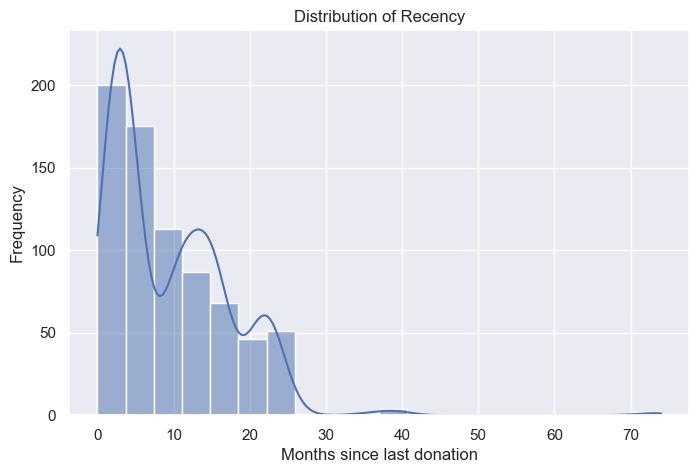

In [9]:
# Recency
plt.figure(figsize=(8,5))
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title("Distribution of Recency")
plt.xlabel("Months since last donation")
plt.ylabel("Frequency")
plt.show()

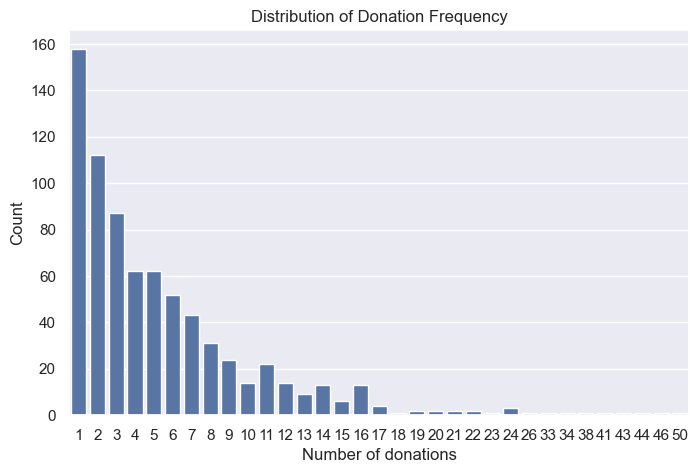

In [10]:
# Frequency
plt.figure(figsize=(8,5))
sns.countplot(x=df['Frequency'])
plt.title("Distribution of Donation Frequency")
plt.xlabel("Number of donations")
plt.ylabel("Count")
plt.show()

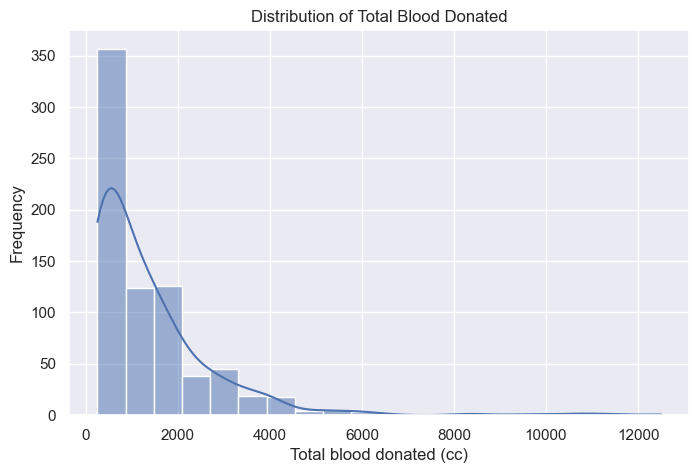

In [11]:
# Monetary
plt.figure(figsize=(8,5))
sns.histplot(df['Monetary'], bins=20, kde=True)
plt.title("Distribution of Total Blood Donated")
plt.xlabel("Total blood donated (cc)")
plt.ylabel("Frequency")
plt.show()

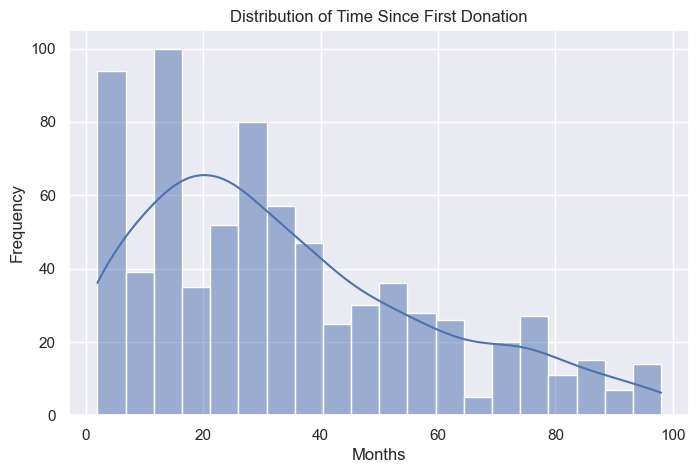

In [12]:
# Time
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=20, kde=True)
plt.title("Distribution of Time Since First Donation")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

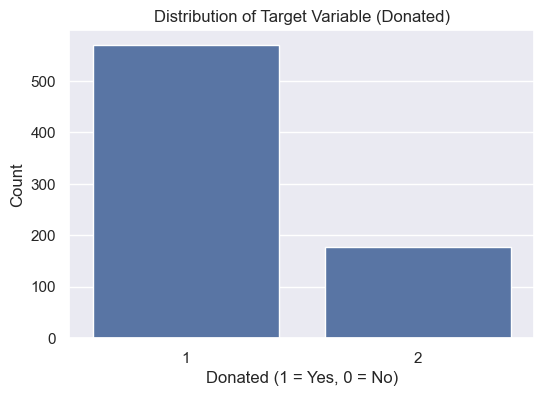

In [13]:
# Target variable (Class)
plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'])
plt.title("Distribution of Target Variable (Donated)")
plt.xlabel("Donated (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

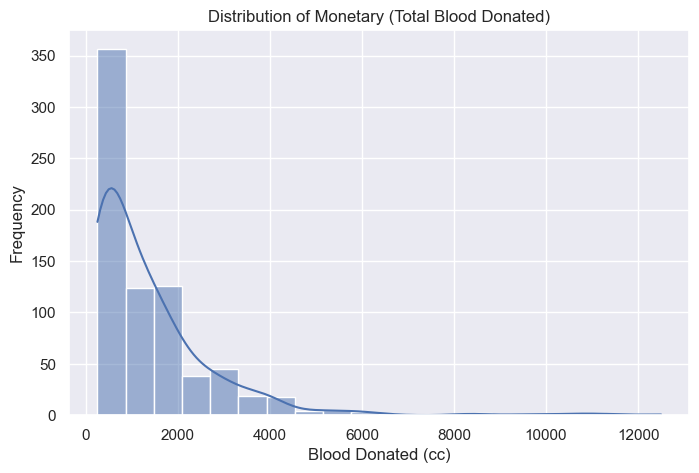

In [14]:
# Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df['Monetary'], bins=20, kde=True)
plt.title("Distribution of Monetary (Total Blood Donated)")
plt.xlabel("Blood Donated (cc)")
plt.ylabel("Frequency")
plt.show()

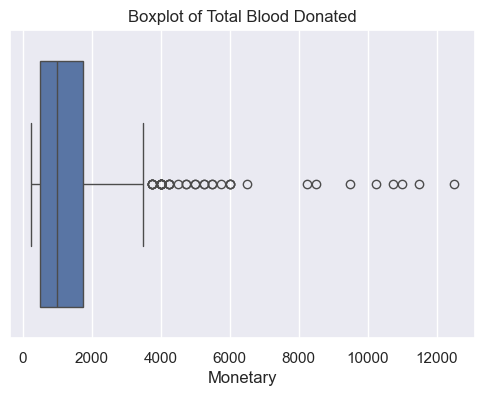

In [15]:
# Boxplot to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Monetary'])
plt.title("Boxplot of Total Blood Donated")
plt.show()

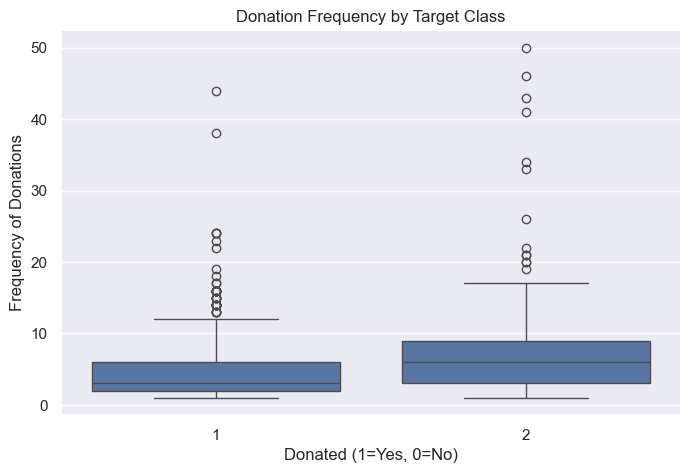

In [16]:
#Frequency vs Class
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Frequency', data=df)
plt.title("Donation Frequency by Target Class")
plt.xlabel("Donated (1=Yes, 0=No)")
plt.ylabel("Frequency of Donations")
plt.show()

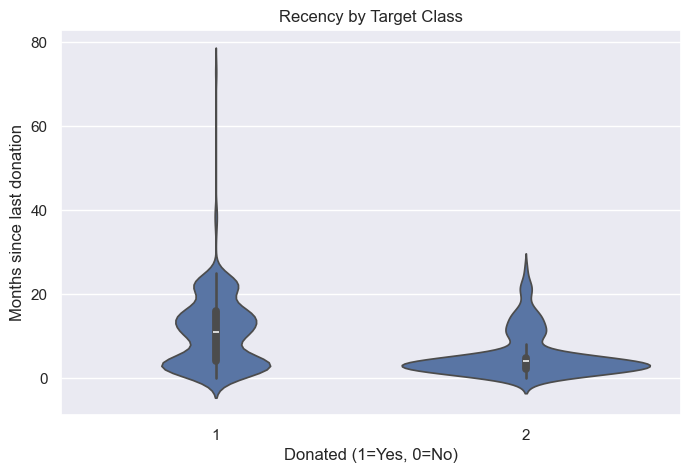

In [17]:
#Recency vs Class
plt.figure(figsize=(8,5))
sns.violinplot(x='Class', y='Recency', data=df)
plt.title("Recency by Target Class")
plt.xlabel("Donated (1=Yes, 0=No)")
plt.ylabel("Months since last donation")
plt.show()

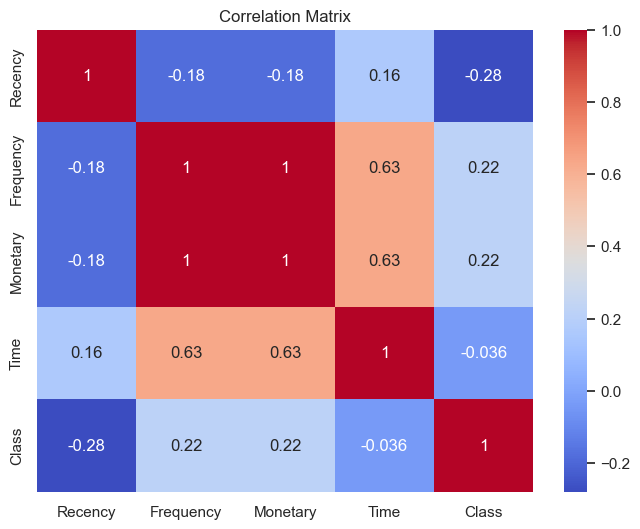

In [18]:
#Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

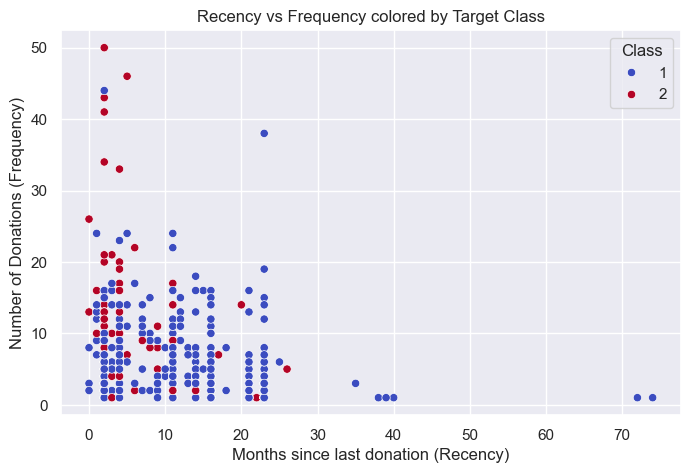

In [19]:
#Donations vs Recency
plt.figure(figsize=(8,5))
sns.scatterplot(x='Recency', y='Frequency', hue='Class', data=df, palette='coolwarm')
plt.title("Recency vs Frequency colored by Target Class")
plt.xlabel("Months since last donation (Recency)")
plt.ylabel("Number of Donations (Frequency)")
plt.show()

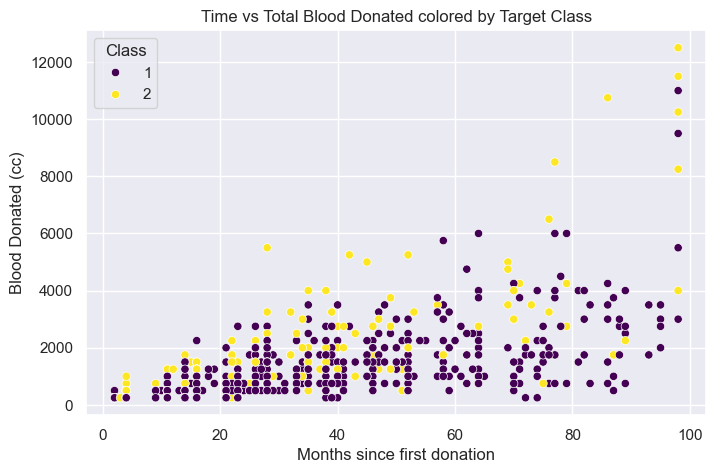

In [20]:
#Time vs Monetary
plt.figure(figsize=(8,5))
sns.scatterplot(x='Time', y='Monetary', hue='Class', data=df, palette='viridis')
plt.title("Time vs Total Blood Donated colored by Target Class")
plt.xlabel("Months since first donation")
plt.ylabel("Blood Donated (cc)")
plt.show()